# Принятие решений в бизнесе

В нашем распоряжении три датасета. 

- В файле `hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.
- Файл `orders.csv` содержит информацию о заказах.
- Файл `visitors.csv` — информацию о пользователях.

Задача - подготовить список гипотез для увеличения выручки.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

<h1>Оглавление:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и подготовка к анализу</a></span><ul class="toc-item"><li><span><a href="#Импортирование-библиотек" data-toc-modified-id="Импортирование-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импортирование библиотек</a></span></li><li><span><a href="#Ознакомление-с-таблицами" data-toc-modified-id="Ознакомление-с-таблицами-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ознакомление с таблицами</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Приоритизация гипотез</a></span><ul class="toc-item"><li><span><a href="#Фреймворк-ICE" data-toc-modified-id="Фреймворк-ICE-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Фреймворк ICE</a></span></li><li><span><a href="#Фреймворк-RICE" data-toc-modified-id="Фреймворк-RICE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Фреймворк RICE</a></span></li><li><span><a href="#Различия-в-очередности-проверки-гипотез" data-toc-modified-id="Различия-в-очередности-проверки-гипотез-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Различия в очередности проверки гипотез</a></span></li></ul></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Графики-кумулятивной-выручки-по-дням-по-группам" data-toc-modified-id="Графики-кумулятивной-выручки-по-дням-по-группам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Графики кумулятивной выручки по дням по группам</a></span></li><li><span><a href="#Графики-кумулятивного-среднего-чека-по-дням-для-каждой-группы" data-toc-modified-id="Графики-кумулятивного-среднего-чека-по-дням-для-каждой-группы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Графики кумулятивного среднего чека по дням для каждой группы</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-чека-группы-B-к-группе-A-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего чека группы B к группе A</a></span></li><li><span><a href="#График-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам" data-toc-modified-id="График-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>График кумулятивного среднего количества заказов на посетителя по группам</a></span></li><li><span><a href="#График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A" data-toc-modified-id="График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-B-к-группе-A-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A</a></span></li><li><span><a href="#Точечный-график-количества-заказов-по-пользователям" data-toc-modified-id="Точечный-график-количества-заказов-по-пользователям-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Точечный график количества заказов по пользователям</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-количества-заказов-на-пользователя" data-toc-modified-id="95-й-и-99-й-перцентили-количества-заказов-на-пользователя-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>95-й и 99-й перцентили количества заказов на пользователя</a></span></li><li><span><a href="#График-стоимостей-заказов" data-toc-modified-id="График-стоимостей-заказов-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>График стоимостей заказов</a></span></li><li><span><a href="#95-й-и-99-й-перцентили-стоимости-заказов" data-toc-modified-id="95-й-и-99-й-перцентили-стоимости-заказов-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>95-й и 99-й перцентили стоимости заказов</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным-3.10"><span class="toc-item-num">3.10&nbsp;&nbsp;</span>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-3.11"><span class="toc-item-num">3.11&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным-3.12"><span class="toc-item-num">3.12&nbsp;&nbsp;</span>Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</a></span></li><li><span><a href="#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-3.13"><span class="toc-item-num">3.13&nbsp;&nbsp;</span>Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li><li><span><a href="#Решение-по-результатам-теста" data-toc-modified-id="Решение-по-результатам-теста-3.14"><span class="toc-item-num">3.14&nbsp;&nbsp;</span>Решение по результатам теста</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Загрузка данных и подготовка к анализу

Ознакомимся с датасетами и выполним предобработку.

### Импортирование библиотек

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

### Ознакомление с таблицами

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
plt.style.use('bmh')

In [3]:
hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'),
    pd.read_csv('orders.csv'),
    pd.read_csv('visitors.csv')
)

**Hypothesis**

In [4]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]
display(hypothesis.head(10))
hypothesis.info()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


**Orders**

In [5]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders.rename(columns = {"transactionid": "transaction_id",
                    "visitorid": "visitor_id"}, 
          inplace = True)
display(orders.head(10))
orders.info()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


    Изменим тип данных в столбце "date" на datetime.

In [6]:
orders['date'] = pd.to_datetime(orders['date'])

    Проверим количество групп в A/B-тесте.

In [7]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

    Проверим минимальную и максимальную даты привлечения.

In [8]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [9]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

Временной промежуток от 1 августа 2019 до 31 августа 2019.

    Посмотрим на распределение пользователей в каждой группе.

In [10]:
orders.groupby('group')['visitor_id'].count()

group
A    557
B    640
Name: visitor_id, dtype: int64

Распределение пользователей по группам примерно равное.

    Проверим, присутствуют ли пользователи, состоящие в обеих группах.

In [11]:
len(np.intersect1d(orders.query('group == "A"')['visitor_id'], orders.query(
'group == "B"')['visitor_id'], assume_unique = False))

58

Пользователей, присутствующих не так много, поэтому оставим их как есть.

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


**Visitors**

In [13]:
display(visitors.head(10))
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


    Изменим тип данных в столбце "date" на datetime.

In [14]:
visitors['date'] = pd.to_datetime(visitors['date'])

    Проверим количество групп в A/B-тесте.

In [15]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

    Проверим минимальную и максимальную даты привлечения.

In [16]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [17]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Временной промежуток от 1 августа 2019 до 31 августа 2019.

    Посмотрим на распределение пользователей в каждой группе.

In [18]:
visitors.groupby('group')['visitors'].sum()

group
A    18736
B    18916
Name: visitors, dtype: int64

Распределение пользователей по группам примерно равное.

In [19]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Приоритизация гипотез

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE.

###  Фреймворк ICE 

In [20]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Используя фреймворк ICE можно увидеть очередность тестирования гипотез.

В первую очередь стоит проверить гипотезу `Запустить акцию, дающую скидку на товар в день рождения`.

###  Фреймворк RICE 

In [21]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Используя фреймворк RICE можно увидеть очередность тестирования гипотез.

В первую очередь стоит проверить гипотезу `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`.

### Различия в очередности проверки гипотез 

При использовании фреймворка ICE видим, что предпочтение нужно отдать гипотезе `Запустить акцию, дающую скидку на товар в день рождения`, тогда как после использования фреймворка RICE приоритетной становится гипотеза `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`. 

Различия заключаются в том, что во втором случае учитывается количество пользователей, которых затронет нововведение.

Так как изменения во время проверки гипотезы `Запустить акцию, дающую скидку на товар в день рождения` затронут минимальное количество человек, тогда как гипотеза `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок` затронет большинство клиентов, стоит предпочесть проверку второй гипотезы.

## Анализ A/B-теста 

Проведен A/B-тест, результаты описаны в таблицах `orders` и `visitors`.

1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.
1. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.
1. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.
1. Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.
1. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.
1. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.
1. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
1. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.
1. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
1. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.
1. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.
1. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.
1. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.
1. Примем решение по результатам теста. Варианты решений:
- 1. Остановить тест, зафиксировать победу одной из групп.
- 2. Остановить тест, зафиксировать отсутствие различий между группами.
- 3. Продолжить тест.

Соберём необходимые кумулятивные данные.

In [22]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]\
            .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 
                  'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
            .sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
            visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
            .sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


### Графики кумулятивной выручки по дням по группам

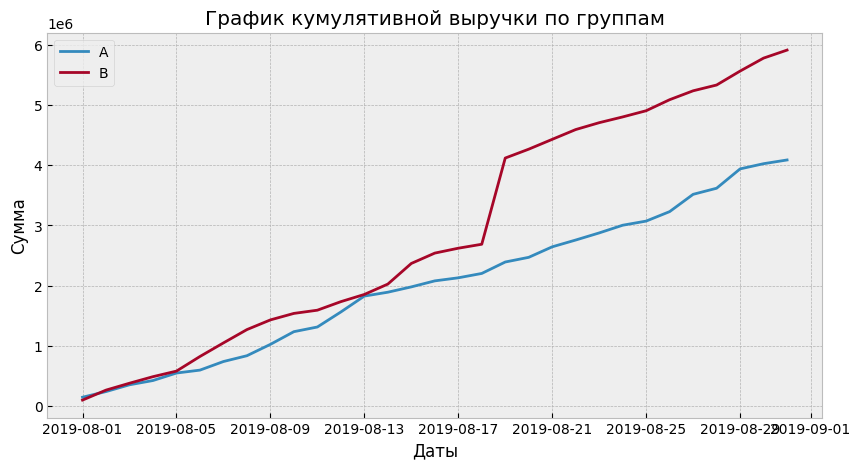

In [23]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты')
plt.ylabel('Сумма')
plt.legend() 

plt.show()

Сегмент B вырывается вперёд и лидирует до конца теста.

Видим, что аномально большие заказы влияют на результаты. При заключительном анализе их нужно удалить.

### Графики кумулятивного среднего чека по дням для каждой группы

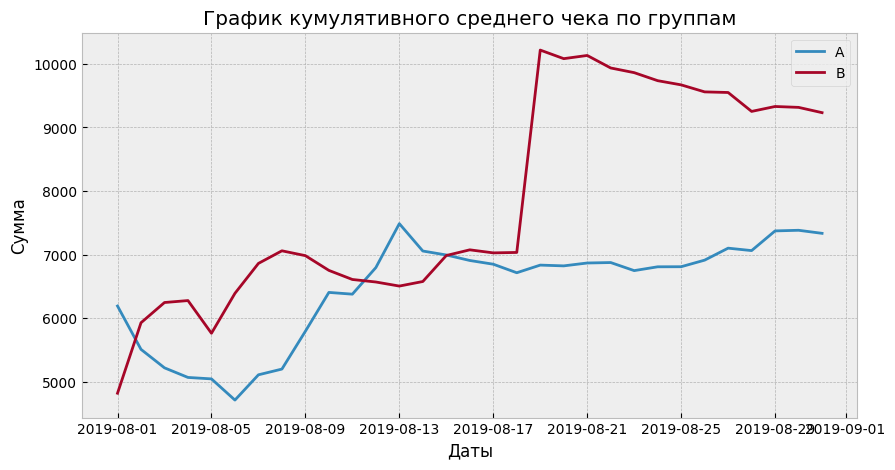

In [24]:
plt.figure(figsize=(10, 5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты')
plt.ylabel('Сумма')
plt.legend() 

plt.show()

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов, которые так сильно искажают результаты.

### График относительного изменения кумулятивного среднего чека группы B к группе A 

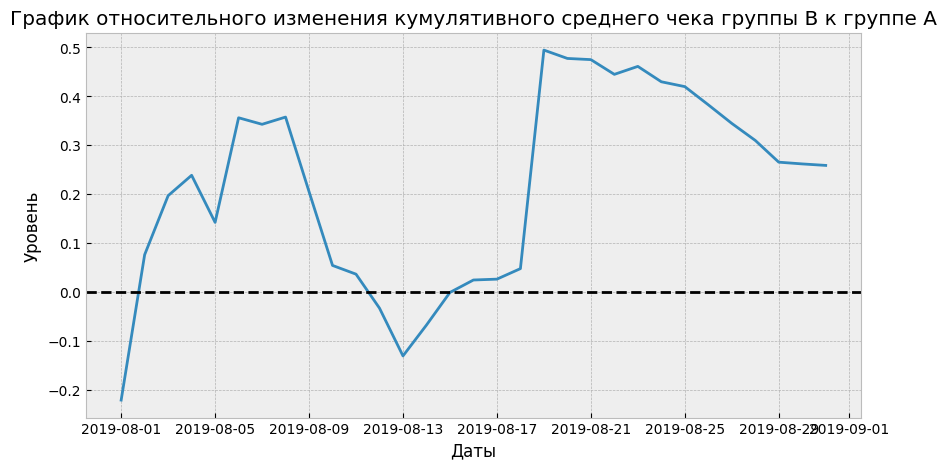

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Уровень')

plt.show()

Результаты теста значительно и резко менялись в несколько дат. Вероятно, именно тогда были совершены аномальные заказы.

### График кумулятивного среднего количества заказов на посетителя по группам

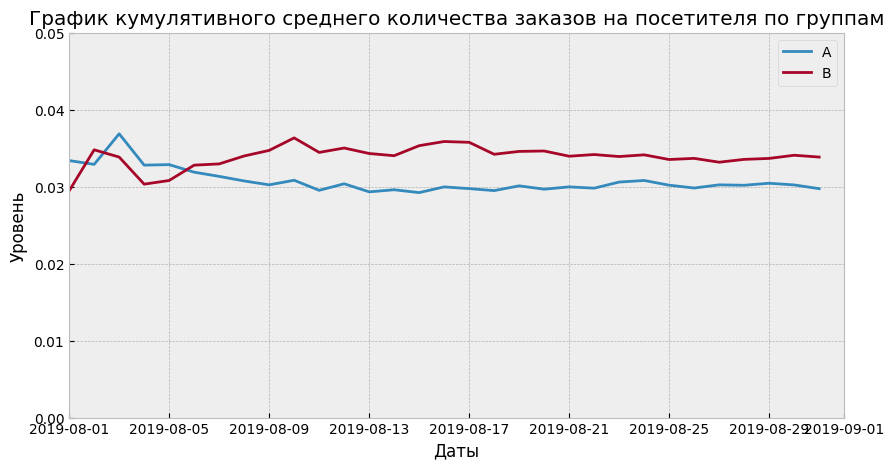

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10, 5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Даты')
plt.ylabel('Уровень')
plt.legend() 

plt.show()

В начале теста сегмент A имел большую конверсию, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.

Мы изменили масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое: от 2% до 4%. В относительных величинах — это почти в 2 раза. Потому, если убрать масштаб осей, будет казаться, что колебания продолжаются, и конверсия не установилась около своего среднего значения.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

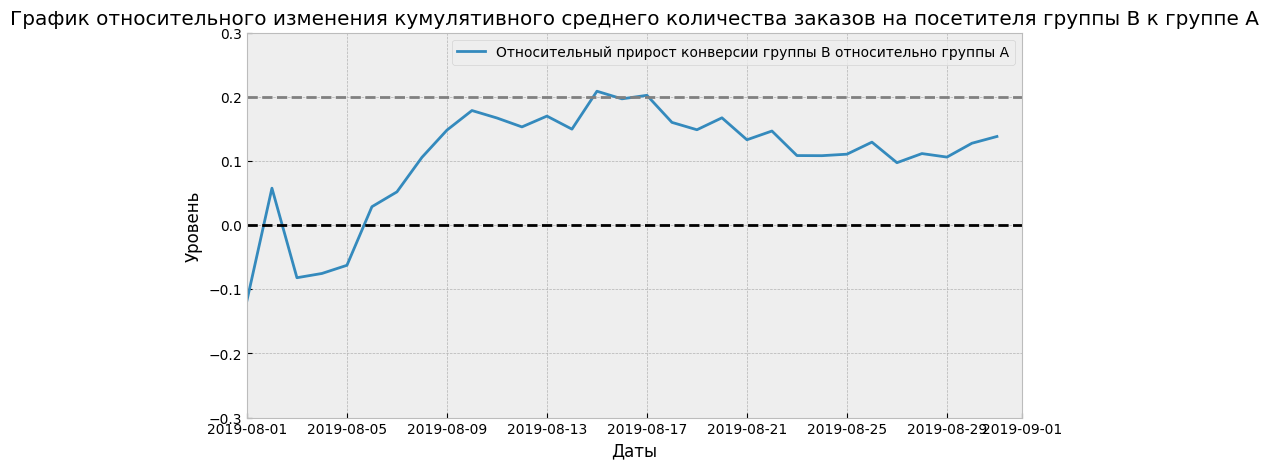

In [27]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10, 5))

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Уровень')
plt.legend() 

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])
plt.show()

Почти с самого начала теста группа B лидирует по конверсии: становится лучше и лучше, либо зафиксировалась около прироста в 15% относительно группы A.

### Точечный график количества заказов по пользователям

Датафрейм с числом заказов по пользователям. 

In [28]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'}))
ordersByUsers.columns = ['visitor_id', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим диаграмму методом scatter().

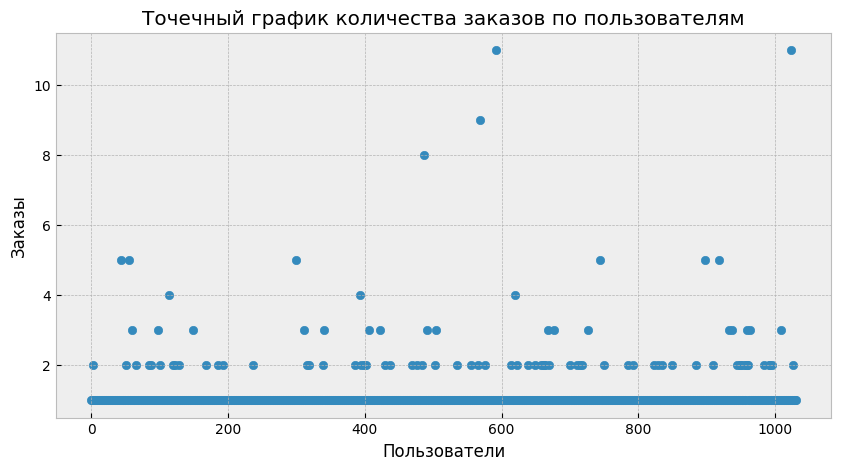

In [29]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(10, 5))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')

plt.show()

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными. 

### 95-й и 99-й перцентили количества заказов на пользователя

In [30]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей — больше четырёх заказов.

###  График стоимостей заказов

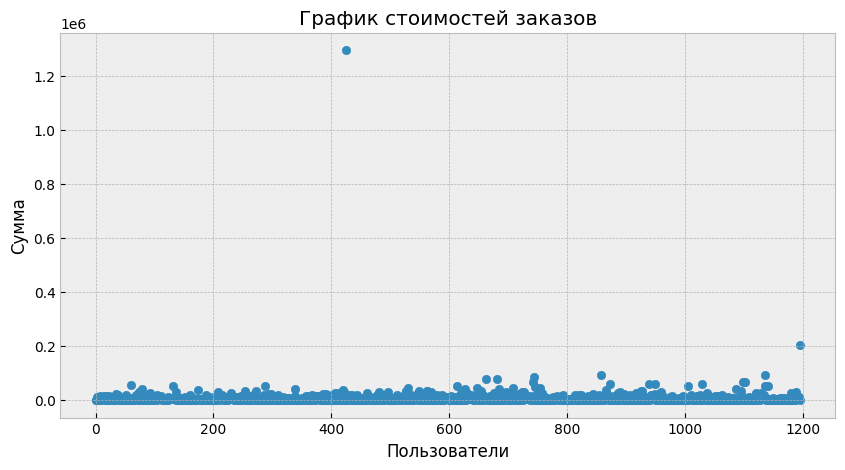

In [31]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 5))

plt.scatter(x_values, orders['revenue']) 

plt.title('График стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма')

plt.show()

Видим два заказа, стоимость которых превышает 150 000 рублей. Найдем 95-й и 99-й перцентили.

### 95-й и 99-й перцентили стоимости заказов

In [32]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28 000 рублей. И не больше, чем у 1% заказов — дороже 58 233 рублей. 

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Гипотезы**

    H0: в среднем количестве заказов между группами по «сырым» данным нет статистически значимых различий
    H1: в среднем количестве заказов между группами по «сырым» данным есть статистически значимые различия

Подготовим данные к анализу.

In [33]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']


pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                                    name='orders')]
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, 
                index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, 
                index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [34]:
print("P-value равно", format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост равен", '{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

P-value равно 0.016792355056752608
Относительный прирост равен 0.138


P-value значительно меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8%.

Сравним средние чеки по "сырым данным", а затем обе метрики ещё раз после удаления выбросов.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Гипотезы**

    H0: в среднем чеке заказа между группами по "сырым" данным нет статистически значимых различий
    H1: в среднем чеке заказа между группами по "сырым" данным есть статистически значимые различия

In [35]:
print("P-value равно", format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                           orders[orders['group']=='B']['revenue'])[1]))

print("Относительный прирост равен", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/
                                                      orders[orders['group']=='A']['revenue'].mean()-1))

P-value равно 0.7292909855432458
Относительный прирост равен 0.259


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами 25.9%

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 28 000 рублей. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= int(np.percentile(ordersByUsers['orders'], [99]))]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] >= int(np.percentile(ordersByUsers['orders'], [99]))]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [95])) ]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitor_id, dtype: int64

Теперь у нас есть множество аномальных пользователей. После их удаления можно считать статистическую значимость. Надо выяснить, есть ли существенные различия между группами с очищенными данными.

**Гипотезы**

    H0: в среднем количестве заказов между группами по «сырым» данным нет статистически значимых различий
    H1: в среднем количестве заказов между группами по «сырым» данным есть статистически значимые различия

In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [38]:
print("P-value равно", format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print("Относительный прирост равен", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value равно 0.017942888591552505
Относительный прирост равен 0.148


Как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A. 

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Гипотезы**

    H0: в среднем чеке заказа между группами по "очищенным" данным нет статистически значимых различий
    H1: в среднем чеке заказа между группами по "очищенным" данным есть статистически значимые различия

In [39]:
print("P-value равно",
    format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Относительный прирост равен",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value равно 0.9765292921254219
Относительный прирост равен -0.017


P-value всё также превышает 0.5, поэтому мы не отвергаем нулевую теорию. Относительный прирост среднего чека между сегментами равен -1.7%

###  Решение по результатам теста

Результаты анализа:

- График различия среднего чека колеблется: он и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около прироста в **15%**.
- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Статистически значимого различия по среднему чеку между группами нет как по сырым данным, так и после удаления аномалий.


**Вывод**: благодаря анализу A/B-теста мы выяснили, что в альтернативной гипотезе нет изменений в среднем чеке, но увеличилась конверсия на 15%.

Стоит остановить тест и зафиксировать победу группы B.

## Вывод 

1. **Приоритезация гипотез**

    - Рассчитали значения фреймворков **ICE** и **RICE**. Обнаружив отличия в приоритетах, объяснили их разным охватом пользователей. Выбрали **RICE** как основной критерий. Приоритет получила гипотеза 7: `Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок`.


2. **Анализ А/В-теста**

    - **Изучение кумулятивных метрик**: подготовили кумулятивные данные для построения графиков. Изучили графики кумулятивной выручки и среднего чека. Выяснили, что в данных содержатся выбросы, потому что графики "скачут". По группам метрики практически не различаются. Изучили график кумулятивной конверсии - группа В стабилизировалась над группой А, также это видно на графике относительного изменения конверсии. На этом этапе заметили различия в конверсии и сделали предположение о том, что выручка и средний чек не различаются по группам.

    - **Анализ выбросов**: так как на предыдущем шаге были обнаружены скачки на графиках, проанализировали выбросы для наших метрик. Для среднего чека искали выбросы в стоимости заказов, для конверсии - в количестве заказов на пользователя за период теста. За границу отсеивания выбрали 95 персентиль.

    - **Расчет статистической значимости различий на сырых данных**: проверили значимость различий в конверсии и среднем чеке.

        - Найдены статистически значимые различия в конверсиях. Наблюдается прирост в группе В на **13.8%**
        - Статистически значимых различий в средних чеках групп не обнаружено, однако обнаружен прирост в **группе В** на **25.9%**. Сделали предположение на выбросы.
    
    - **Расчет статистической значимости различий на очищенных данных**: проверили значимость различий в конверсии и среднем чеке.

        - Получили более точный результат по конверсии. Присутствует статистически значимый прирост в **группе В** на **14.8%**. 
        - Тест о средних чеках дал все тот же результат - различий нет. Однако отсеев выбросы, мы видим реальную картину относительного изменения в **-1,7%**.
        - Результаты получили на уровне значимости в 95% (использовали alpha=0.05)



3. **Решение по результатам теста**

Принято решение остановить тест и зафиксировать победу **группы B**, так как в альтернативной гипотезе нет изменений в среднем чеке, но увеличилась конверсия на **15%**. 